In [ ]:
import pandas as pd

: 

In [3]:
import os

data_path = "../data/raw/partition_id=0/part-0.parquet"

# Check if the file exists
print(os.path.exists(data_path))

# Print the absolute path
print(os.path.abspath(data_path))

True
/Users/caroline/Documents/TUM/Python/MarketForecasting/data/raw/partition_id=0/part-0.parquet


In [4]:
# Define the path to the data file
data_path = "../data/raw/partition_id=0/part-0.parquet" # 

# Load the dataset
day0_data = pd.read_parquet(data_path)

# Display basic info about the dataset
day0_data.info()
day0_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944210 entries, 0 to 1944209
Data columns (total 92 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date_id      int16  
 1   time_id      int16  
 2   symbol_id    int8   
 3   weight       float32
 4   feature_00   float32
 5   feature_01   float32
 6   feature_02   float32
 7   feature_03   float32
 8   feature_04   float32
 9   feature_05   float32
 10  feature_06   float32
 11  feature_07   float32
 12  feature_08   float32
 13  feature_09   int8   
 14  feature_10   int8   
 15  feature_11   int16  
 16  feature_12   float32
 17  feature_13   float32
 18  feature_14   float32
 19  feature_15   float32
 20  feature_16   float32
 21  feature_17   float32
 22  feature_18   float32
 23  feature_19   float32
 24  feature_20   float32
 25  feature_21   float32
 26  feature_22   float32
 27  feature_23   float32
 28  feature_24   float32
 29  feature_25   float32
 30  feature_26   float32
 31  feature_27   float32
 32

,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,...,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
0,0,0,1,3.889038,NaN,NaN,NaN,NaN,NaN,0.851033,...,-0.281498,0.738489,-0.069556,1.380875,2.005353,0.186018,1.218368,0.775981,0.346999,0.095504
1,0,0,7,1.370613,NaN,NaN,NaN,NaN,NaN,0.676961,...,-0.302441,2.965889,1.190077,-0.523998,3.849921,2.626981,5.000000,0.703665,0.216683,0.778639
2,0,0,9,2.285698,NaN,NaN,NaN,NaN,NaN,1.056285,...,-0.096792,-0.864488,-0.280303,-0.326697,0.375781,1.271291,0.099793,2.109352,0.670881,0.772828
3,0,0,10,0.690606,NaN,NaN,NaN,NaN,NaN,1.139366,...,-0.296244,0.408499,0.223992,2.294888,1.097444,1.225872,1.225376,1.114137,0.775199,-1.379516
4,0,0,14,0.440570,NaN,NaN,NaN,NaN,NaN,0.955200,...,3.418133,-0.373387,-0.502764,-0.348021,-3.928148,-1.591366,-5.000000,-3.572820,-1.089123,-5.000000


In [5]:
# Data cleaning

# Calculate missing values and their percentages
missing_values = day0_data.isnull().sum()
missing_percentage = (missing_values / len(day0_data)) * 100

# Create a DataFrame to display missing values
missing_values_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_values_df = missing_values_df[missing_values_df["Missing Values"] > 0].sort_values(by="Percentage", ascending=False)

# Count total columns with missing values
total_missing_cols = missing_values_df.shape[0]  # Total columns with missing values
print(f"Total columns with missing values: {total_missing_cols}")

Total columns with missing values: 44


In [6]:
# Display the 44 columns with missing values
missing_values_df.head(44)

,Missing Values,Percentage
feature_00,1944210,100.000000
feature_21,1944210,100.000000
feature_31,1944210,100.000000
feature_27,1944210,100.000000
feature_26,1944210,100.000000
feature_01,1944210,100.000000
feature_04,1944210,100.000000
feature_03,1944210,100.000000
feature_02,1944210,100.000000
feature_42,324732,16.702517


In [7]:
# Dropping columns with 100% many missing values

# Get column names with missing values
missing_counts = day0_data.isnull().sum()
missing_percentage = (missing_counts / len(day0_data)) * 100

# Create DataFrame to track missing values
missing_df = pd.DataFrame({'Missing Values': missing_counts, 'Percentage': missing_percentage})

# Filter columns where missing percentage is 100% or above the threshold
missing_threshold = 100
columns_to_drop = missing_df[missing_df['Percentage'] == 100].index.tolist()
columns_to_drop_threshold = missing_df[missing_df['Percentage'] > missing_threshold].index.tolist()

# Ensure columns exist before dropping
columns_to_drop = [col for col in columns_to_drop if col in day0_data.columns]
columns_to_drop_threshold = [col for col in columns_to_drop_threshold if col in day0_data.columns]

# Drop the columns
day0_data_cleaned = day0_data.drop(columns=columns_to_drop + columns_to_drop_threshold)

# Display new shape
print(f"Shape before dropping: {day0_data.shape}")
print(f"Shape after dropping: {day0_data_cleaned.shape}")

Shape before dropping: (1944210, 92)
Shape after dropping: (1944210, 83)


In [8]:
# Find the dropped columns by comparing original and cleaned dataset
dropped_columns = list(set(day0_data.columns) - set(day0_data_cleaned.columns))

# Display the dropped columns
print("Dropped Columns:")
print(dropped_columns)

Dropped Columns:
['feature_21', 'feature_00', 'feature_26', 'feature_03', 'feature_31', 'feature_27', 'feature_01', 'feature_04', 'feature_02']


In [9]:
# Check data types of remaining columns
print(day0_data_cleaned.dtypes.value_counts())

# Identify numerical and categorical columns separately
numerical_cols = day0_data_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = day0_data_cleaned.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical columns: {len(numerical_cols)}")
print(f"Categorical columns: {len(categorical_cols)}")

float32    77
int16       3
int8        3
Name: count, dtype: int64
Numerical columns: 0
Categorical columns: 0


In [10]:
day0_data_cleaned.ffill(inplace=True)  # Fill forward
day0_data_cleaned.bfill(inplace=True)  # Fill backward for remaining gaps

In [11]:
# Check if there are any missing values left in the dataset
total_missing = day0_data_cleaned.isnull().sum().sum()

if total_missing == 0:
    print("No missing values remain in the dataset!")
else:
    print(f"There are still {total_missing} missing values remaining.")
    print(day0_data_cleaned.isnull().sum()[day0_data_cleaned.isnull().sum() > 0])

No missing values remain in the dataset!


In [12]:
# Check for duplicate rows
duplicate_rows = day0_data_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# If duplicates exist, drop them
if duplicate_rows > 0:
    day0_data_cleaned.drop_duplicates(inplace=True)
    print(f"{duplicate_rows} duplicate rows removed!")
else:
    print("No duplicate rows found.")

Number of duplicate rows: 0
No duplicate rows found.


In [13]:
# Identify all responder columns
responder_columns = [col for col in day0_data_cleaned.columns if col.startswith("responder_")]

# Keep only responder_6
responder_columns_to_drop = [col for col in responder_columns if col != "responder_6"]

# Drop all other responder columns
day0_data_cleaned = day0_data_cleaned.drop(columns=responder_columns_to_drop)

# Display the remaining columns
print(f"Remaining columns after keeping only responder_6: {day0_data_cleaned.columns}")

Remaining columns after keeping only responder_6: Index(['date_id', 'time_id', 'symbol_id', 'weight', 'feature_05', 'feature_06',
       'feature_07', 'feature_08', 'feature_09', 'feature_10', 'feature_11',
       'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16',
       'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_22',
       'feature_23', 'feature_24', 'feature_25', 'feature_28', 'feature_29',
       'feature_30', 'feature_32', 'feature_33', 'feature_34', 'feature_35',
       'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40',
       'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45',
       'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50',
       'feature_51', 'feature_52', 'feature_53', 'feature_54', 'feature_55',
       'feature_56', 'feature_57', 'feature_58', 'feature_59', 'feature_60',
       'feature_61', 'feature_62', 'feature_63', 'feature_64', 'feature_65',
       'feature_66', 'f

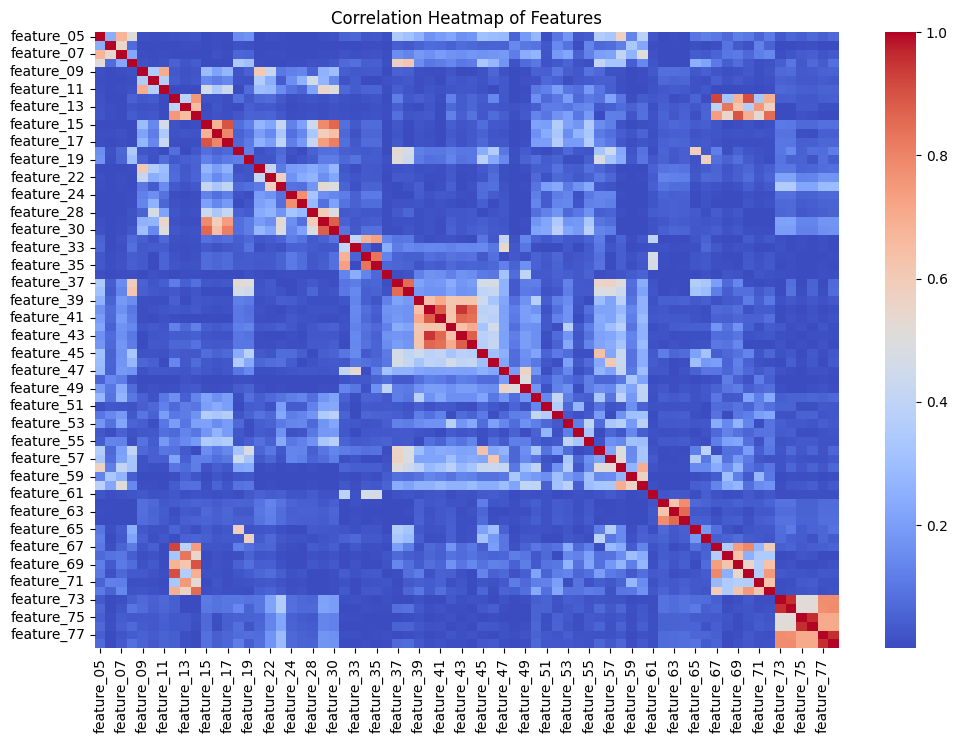

Plot saved as task_feature_correlation_heatmap.png
Removing highly correlated feature: feature_12


/var/folders/61/_nwkfn8n41gcbc7yrsk4kn6m0000gn/T/ipykernel_13845/388476124.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task.drop(columns=[feature_to_remove], inplace=True)


Removing highly correlated feature: feature_15


/var/folders/61/_nwkfn8n41gcbc7yrsk4kn6m0000gn/T/ipykernel_13845/388476124.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task.drop(columns=[feature_to_remove], inplace=True)


Removing highly correlated feature: feature_40


/var/folders/61/_nwkfn8n41gcbc7yrsk4kn6m0000gn/T/ipykernel_13845/388476124.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task.drop(columns=[feature_to_remove], inplace=True)


Removing highly correlated feature: feature_73


/var/folders/61/_nwkfn8n41gcbc7yrsk4kn6m0000gn/T/ipykernel_13845/388476124.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task.drop(columns=[feature_to_remove], inplace=True)


Removing highly correlated feature: feature_13


/var/folders/61/_nwkfn8n41gcbc7yrsk4kn6m0000gn/T/ipykernel_13845/388476124.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task.drop(columns=[feature_to_remove], inplace=True)


Removing highly correlated feature: feature_14


/var/folders/61/_nwkfn8n41gcbc7yrsk4kn6m0000gn/T/ipykernel_13845/388476124.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task.drop(columns=[feature_to_remove], inplace=True)


Removing highly correlated feature: feature_17


/var/folders/61/_nwkfn8n41gcbc7yrsk4kn6m0000gn/T/ipykernel_13845/388476124.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task.drop(columns=[feature_to_remove], inplace=True)


Removing highly correlated feature: feature_41


/var/folders/61/_nwkfn8n41gcbc7yrsk4kn6m0000gn/T/ipykernel_13845/388476124.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task.drop(columns=[feature_to_remove], inplace=True)


Removing highly correlated feature: feature_64


/var/folders/61/_nwkfn8n41gcbc7yrsk4kn6m0000gn/T/ipykernel_13845/388476124.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task.drop(columns=[feature_to_remove], inplace=True)


Removing highly correlated feature: feature_74


/var/folders/61/_nwkfn8n41gcbc7yrsk4kn6m0000gn/T/ipykernel_13845/388476124.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task.drop(columns=[feature_to_remove], inplace=True)


Removing highly correlated feature: feature_24


/var/folders/61/_nwkfn8n41gcbc7yrsk4kn6m0000gn/T/ipykernel_13845/388476124.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task.drop(columns=[feature_to_remove], inplace=True)


Removing highly correlated feature: feature_29


/var/folders/61/_nwkfn8n41gcbc7yrsk4kn6m0000gn/T/ipykernel_13845/388476124.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task.drop(columns=[feature_to_remove], inplace=True)


Removing highly correlated feature: feature_34


/var/folders/61/_nwkfn8n41gcbc7yrsk4kn6m0000gn/T/ipykernel_13845/388476124.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task.drop(columns=[feature_to_remove], inplace=True)


Removing highly correlated feature: feature_37


/var/folders/61/_nwkfn8n41gcbc7yrsk4kn6m0000gn/T/ipykernel_13845/388476124.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task.drop(columns=[feature_to_remove], inplace=True)


Removing highly correlated feature: feature_43


/var/folders/61/_nwkfn8n41gcbc7yrsk4kn6m0000gn/T/ipykernel_13845/388476124.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task.drop(columns=[feature_to_remove], inplace=True)


Removing highly correlated feature: feature_67


/var/folders/61/_nwkfn8n41gcbc7yrsk4kn6m0000gn/T/ipykernel_13845/388476124.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task.drop(columns=[feature_to_remove], inplace=True)


Removing highly correlated feature: feature_75


/var/folders/61/_nwkfn8n41gcbc7yrsk4kn6m0000gn/T/ipykernel_13845/388476124.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task.drop(columns=[feature_to_remove], inplace=True)


Removing highly correlated feature: feature_77


/var/folders/61/_nwkfn8n41gcbc7yrsk4kn6m0000gn/T/ipykernel_13845/388476124.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task.drop(columns=[feature_to_remove], inplace=True)


Remaining features after correlation filtering: 57


In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select task features (features starting with "feature")
task_features = [col for col in day0_data_cleaned.columns if col.startswith('feature')]
df_task = day0_data_cleaned[task_features]  

# Ensure that the feature matrix is not empty
if df_task.empty:
    print("Task feature matrix is empty. No features to analyze.")
else:
    # Compute absolute correlation matrix
    corr_matrix = df_task.corr().abs()

    # Check for NaN values in the correlation matrix
    if corr_matrix.isna().all().all():
        print("Correlation matrix contains only NaN values. Cannot proceed.")
    else:
        # Plot the heatmap
        plt.figure(figsize=(12, 8))
        sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
        plt.title("Correlation Heatmap of Features")
        plt.savefig("task_feature_correlation_heatmap.png")  # Save plot
        plt.show()
        print("Plot saved as task_feature_correlation_heatmap.png")

    # **Iterative feature elimination based on correlation threshold**
    corr_threshold = 0.75  # Set threshold for high correlation

    while True:
        # Find feature pairs with correlation above the threshold
        high_corr_pairs = np.where(corr_matrix >= corr_threshold)
        high_corr_pairs = [
            (corr_matrix.index[i], corr_matrix.columns[j]) 
            for i, j in zip(*high_corr_pairs) if i != j
        ]

        if not high_corr_pairs:
            break  # Stop when no more high correlations exist

        # Count occurrences of each feature in high correlation pairs
        feature_counts = {}
        for f1, f2 in high_corr_pairs:
            feature_counts[f1] = feature_counts.get(f1, 0) + 1
            feature_counts[f2] = feature_counts.get(f2, 0) + 1

        # Remove the feature with the highest occurrence in correlations
        feature_to_remove = max(feature_counts, key=feature_counts.get)
        print(f"Removing highly correlated feature: {feature_to_remove}")
        df_task.drop(columns=[feature_to_remove], inplace=True)

        # Recalculate correlation matrix after feature removal
        corr_matrix = df_task.corr().abs()

    # **Keep only the remaining filtered features in the original dataset**
    filtered_features = set(df_task.columns)
    day0_data_cleaned = day0_data_cleaned.drop(columns=set(task_features) - filtered_features)

    print(f"Remaining features after correlation filtering: {len(day0_data_cleaned.columns)}")

In [15]:
# Find the removed features by comparing the original and cleaned dataset
removed_features = list(set(task_features) - set(df_task.columns))
remaining_features = list(df_task.columns)

# Display the removed and remaining features
print(f"Total features removed due to high correlation: {len(removed_features)}")
print("Removed Features:")
print(removed_features)

print("\nTotal features remaining after filtering: ", len(remaining_features))
print("Remaining Features:")
print(remaining_features)

Total features removed due to high correlation: 18
Removed Features:
['feature_34', 'feature_77', 'feature_37', 'feature_74', 'feature_14', 'feature_41', 'feature_13', 'feature_24', 'feature_73', 'feature_12', 'feature_75', 'feature_67', 'feature_40', 'feature_43', 'feature_64', 'feature_17', 'feature_29', 'feature_15']

Total features remaining after filtering:  52
Remaining Features:
['feature_05', 'feature_06', 'feature_07', 'feature_08', 'feature_09', 'feature_10', 'feature_11', 'feature_16', 'feature_18', 'feature_19', 'feature_20', 'feature_22', 'feature_23', 'feature_25', 'feature_28', 'feature_30', 'feature_32', 'feature_33', 'feature_35', 'feature_36', 'feature_38', 'feature_39', 'feature_42', 'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50', 'feature_51', 'feature_52', 'feature_53', 'feature_54', 'feature_55', 'feature_56', 'feature_57', 'feature_58', 'feature_59', 'feature_60', 'feature_61', 'feature_62', 'feature_63', 'feature

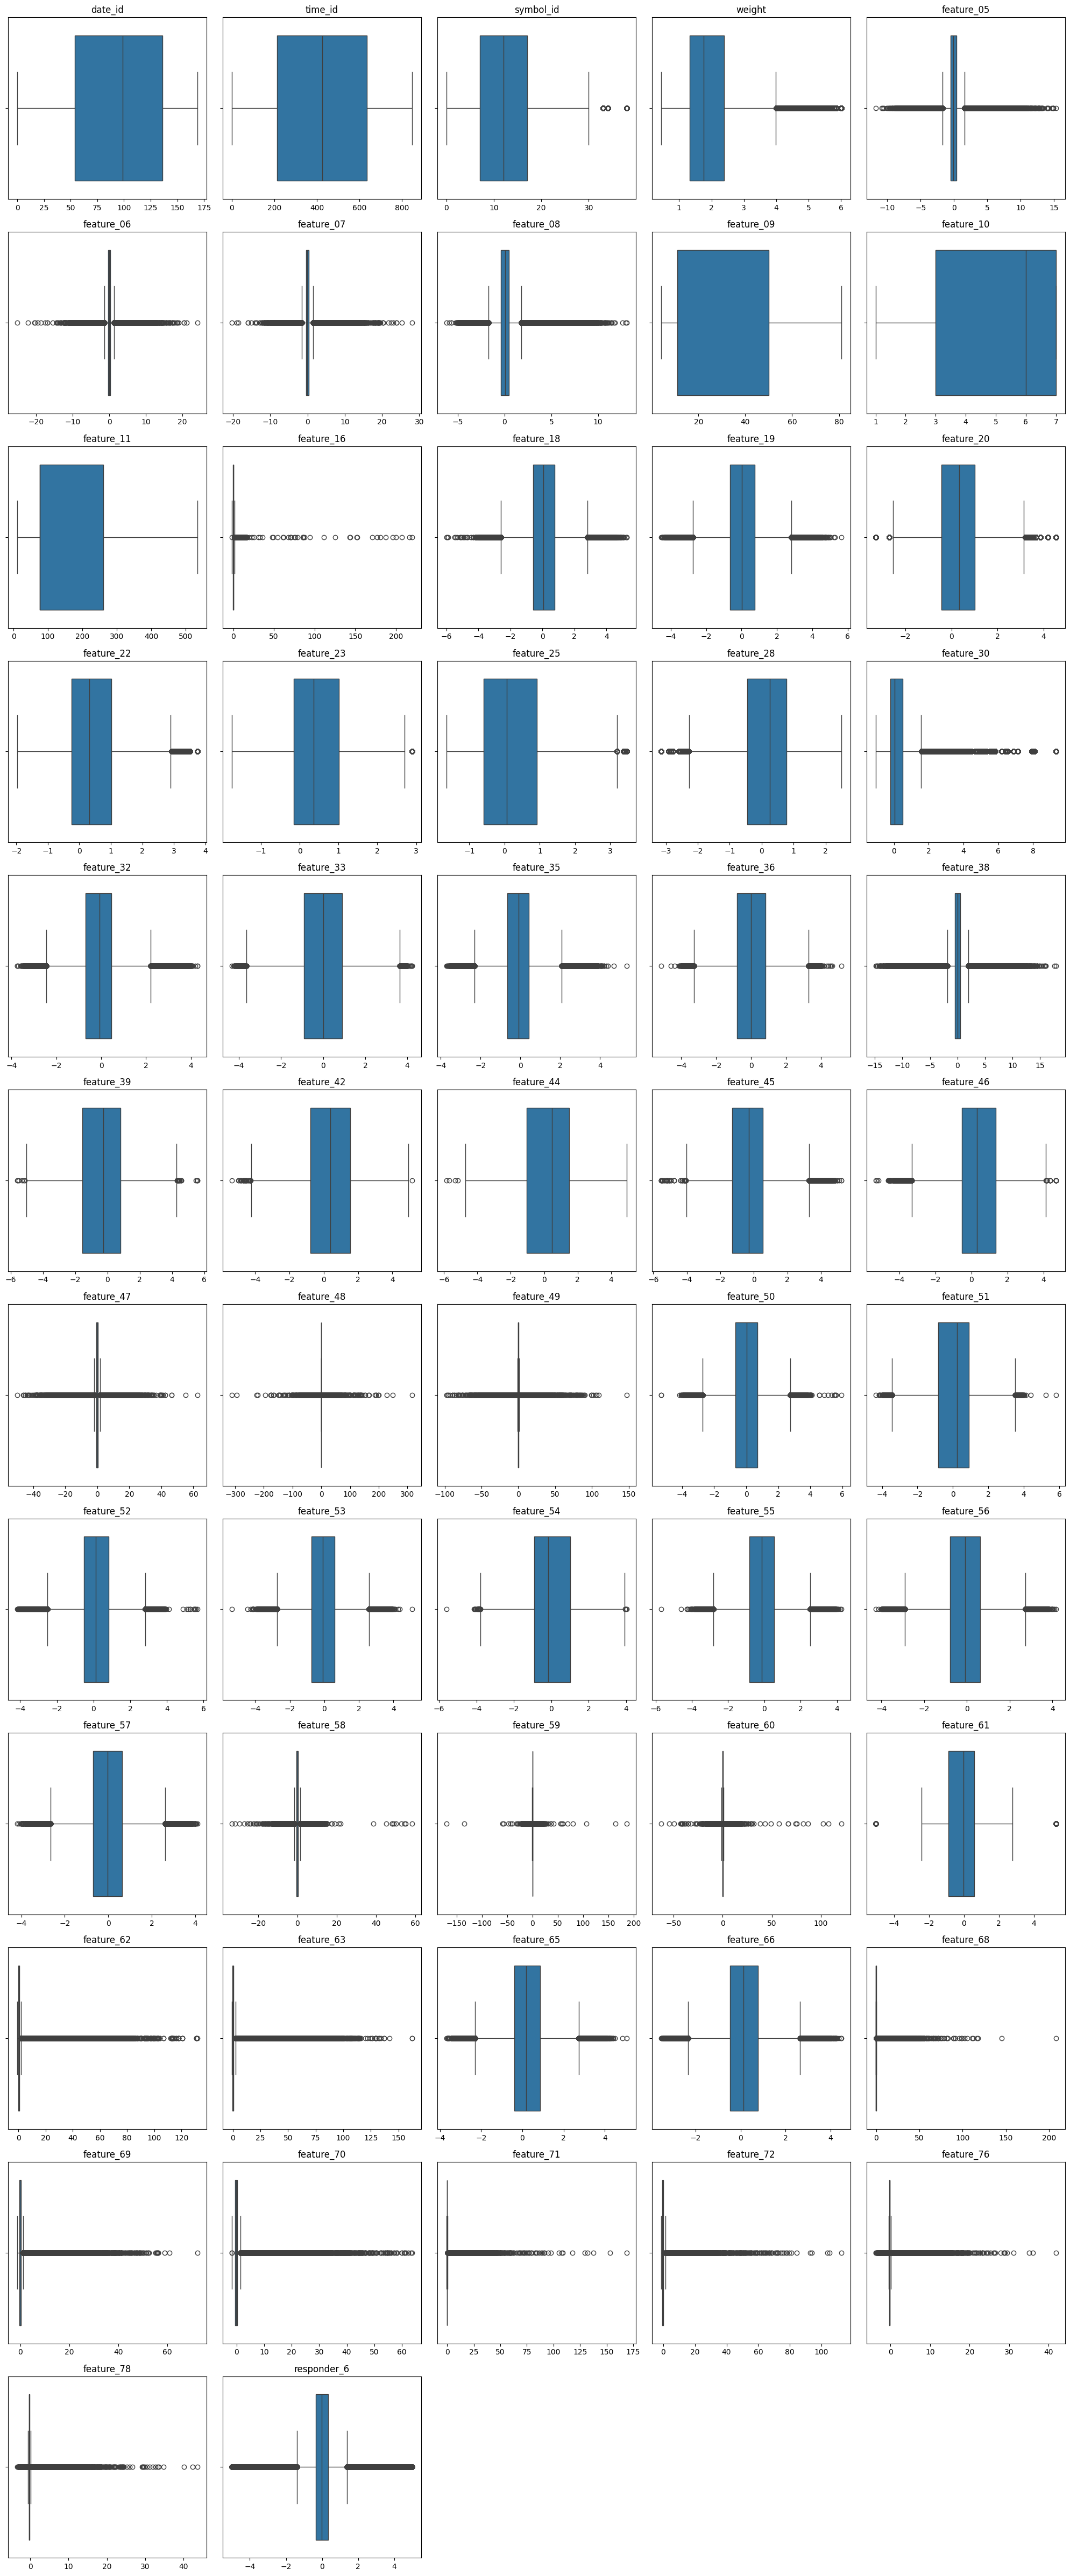

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Select only numerical columns
numerical_cols = day0_data_cleaned.select_dtypes(include=['number']).columns

# Define the number of columns per row for better visualization
cols_per_row = 5  # Adjust based on the number of features
num_features = len(numerical_cols)
num_rows = math.ceil(num_features / cols_per_row)

# Create subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, num_rows * 4))
axes = axes.flatten()  # Flatten in case of multiple rows

# Generate boxplots for each numerical feature
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=day0_data_cleaned[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')

# Hide any extra empty subplots
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [17]:
import numpy as np

# Identify numerical columns
numerical_features = df_task.select_dtypes(include=['number']).columns

# Define the 95th percentile threshold for each feature
percentile_95 = df_task[numerical_features].quantile(0.95)

# Apply capping to limit values to the 95th percentile
df_task_clipped = df_task.copy()
for col in numerical_features:
    df_task_clipped[col] = np.where(df_task[col] > percentile_95[col], percentile_95[col], df_task[col])

# Display changes
print("Outliers above 95th percentile have been capped.")

Outliers above 95th percentile have been capped.


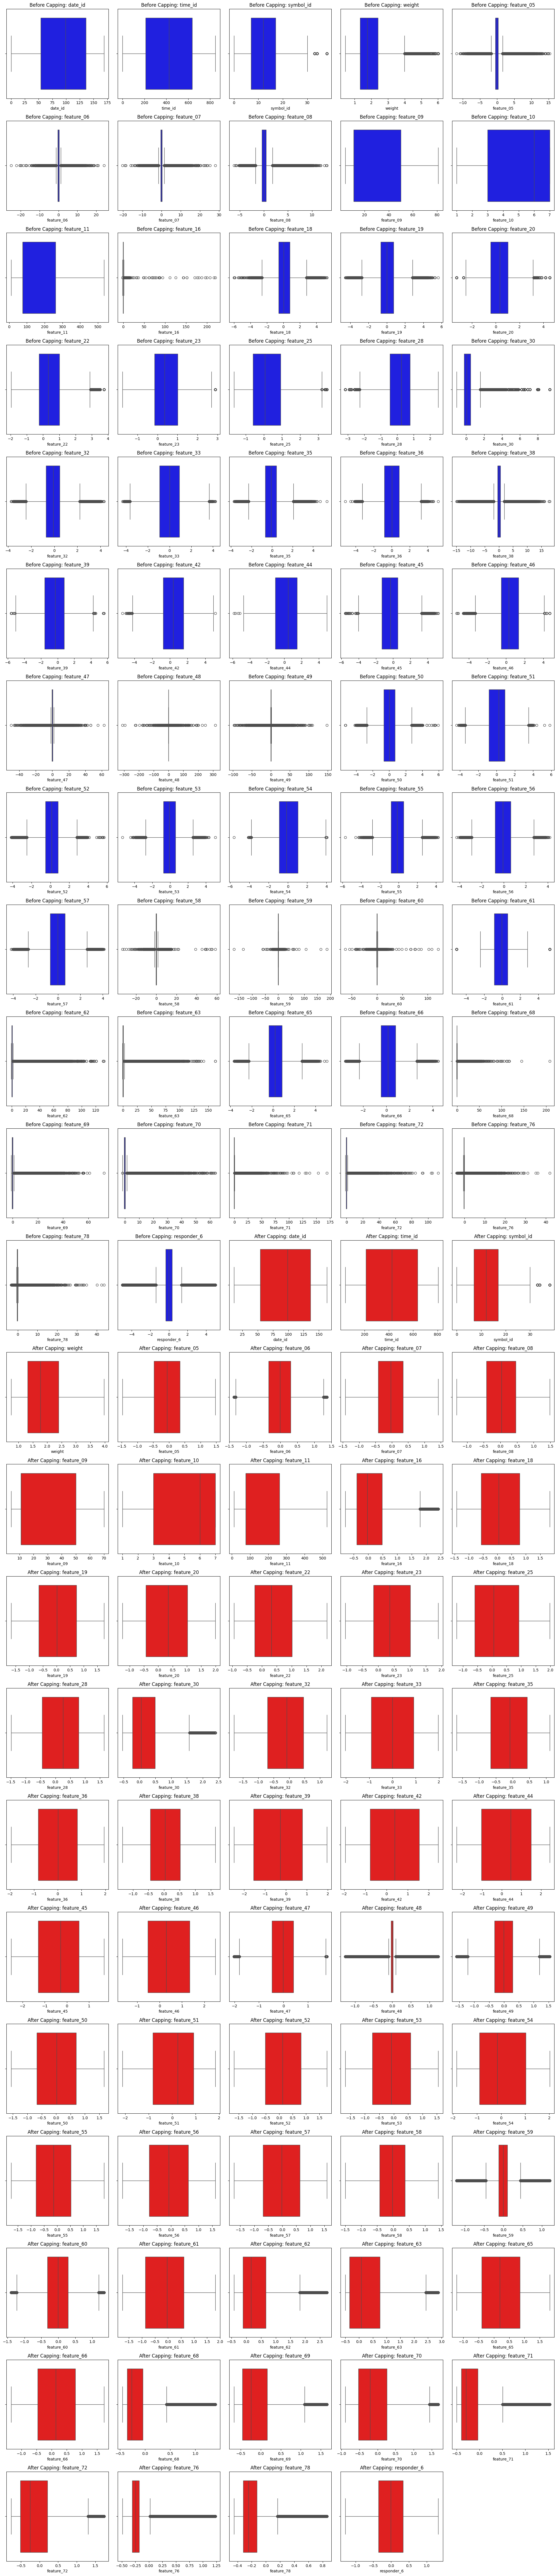

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select only numerical columns
numerical_features = day0_data_cleaned.select_dtypes(include=['number']).columns

# Compute 5th and 95th percentiles for each numerical column
lower_bounds = day0_data_cleaned[numerical_features].quantile(0.05)
upper_bounds = day0_data_cleaned[numerical_features].quantile(0.95)

# Create a copy of the dataset for modification
day0_data_capped = day0_data_cleaned.copy()

# Apply capping (Winsorization) to all numerical features
for col in numerical_features:
    day0_data_capped[col] = np.clip(day0_data_cleaned[col], lower_bounds[col], upper_bounds[col])

# Define the number of columns per row for visualization
cols_per_row = 5  
num_features = len(numerical_features)
num_rows = (num_features // cols_per_row) + (num_features % cols_per_row > 0)

# Create subplots for before & after capping
fig, axes = plt.subplots(num_rows * 2, cols_per_row, figsize=(20, num_rows * 4 * 2))
axes = axes.flatten()

# Plot before and after capping for each feature
for i, col in enumerate(numerical_features):
    sns.boxplot(x=day0_data_cleaned[col], ax=axes[i], color='blue')
    axes[i].set_title(f"Before Capping: {col}")

    sns.boxplot(x=day0_data_capped[col], ax=axes[i + num_features], color='red')
    axes[i + num_features].set_title(f"After Capping: {col}")

# Remove extra subplots if not needed
for i in range(num_features * 2, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [19]:
import os

# Define output directory and filename
output_dir = "../data/cleaned/"
os.makedirs(output_dir, exist_ok=True)  # Ensure the directory exists

# Save as CSV
csv_path = os.path.join(output_dir, "day0_data_cleaned_finalcode.csv")
day0_data_cleaned.to_csv(csv_path, index=False)
print(f"Cleaned data saved as CSV: {csv_path}")

# Save as Parquet
parquet_path = os.path.join(output_dir, "day0_data_cleaned_finalcode.parquet")
day0_data_cleaned.to_parquet(parquet_path, index=False)
print(f"Cleaned data saved as Parquet: {parquet_path}")

Cleaned data saved as CSV: ../data/cleaned/day0_data_cleaned_finalcode.csv
Cleaned data saved as Parquet: ../data/cleaned/day0_data_cleaned_finalcode.parquet
